# Building an ANN with the Iris Dataset
    

    

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


## Part 1: Load and Explore the Data

    

In [ ]:
iris = load_iris()
df= pd.DataFrame(iris.data, columns=iris.feature_names )

df['target'] = iris.target


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Part 2: Prepare the Data


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1) # drop labels for training set
y = df["target"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Part 3: Build the ANN Model


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(8 , input_dim=X_train.shape[1], activation= 'relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

optimizer= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,035 (11.86 KB)

 Trainable params: 3,035 (11.86 KB)

 Non-trainable params: 0 (0.00 B)

## Part 4: Train the Model


In [ ]:
history= model.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_test, y_test) , verbose=1)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9649 - loss: 0.0679 - val_accuracy: 0.9667 - val_loss: 0.0620
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9658 - loss: 0.0650 - val_accuracy: 0.9667 - val_loss: 0.0883
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9915 - loss: 0.0506 - val_accuracy: 0.9667 - val_loss: 0.0500
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9706 - loss: 0.0459 - val_accuracy: 0.9667 - val_loss: 0.0586
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9850 - loss: 0.0497 - val_accuracy: 0.9667 - val_loss: 0.0717
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9728 - loss: 0.0557 - val_accuracy: 0.9667 - val_loss: 0.0657
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9944 - loss: 0.0271 - val_accuracy: 0.9667 - val_loss: 0.0626
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9625 - loss: 0.0707 - val_accuracy: 0.9667 - va

### Part 4: Model Evaluation

In [ ]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.9667 - loss: 0.0979


[0.09787718951702118, 0.9666666388511658]

In [ ]:
model.evaluate(X_train, y_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9592 - loss: 0.0947 


[0.10635007172822952, 0.949999988079071]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
F1 Score: 0.97
Recall Score: 0.97


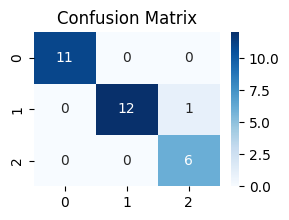

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")
print(f"Recall Score: {recall:.2f}")

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

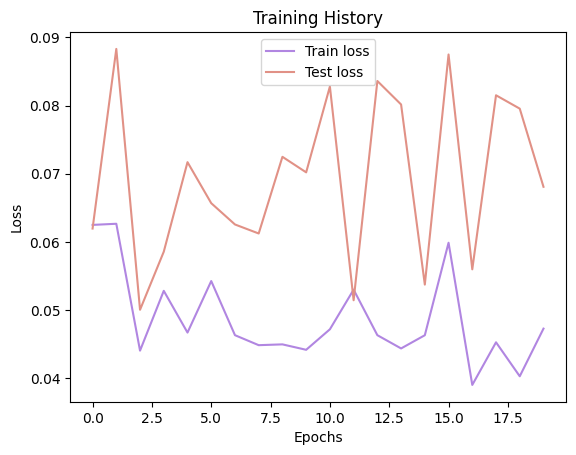

In [ ]:
plt.plot(history.history['loss'], color='#b186e1', label='Train loss')
plt.plot(history.history['val_loss'], color='#e19186', label='Test loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part 5: Experiment and Improve

    

In [ ]:
model2 = Sequential()

model2.add(Dense(8 , input_dim=X_train.shape[1], activation= 'tanh'))
model2.add(Dense(16, activation='tanh'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(3, activation='softmax'))

optimizer= Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-8) #change learning rate
model2.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,867 (526.83 KB)

 Trainable params: 44,955 (175.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,912 (351.22 KB)

In [ ]:
hisroty= model2.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_test, y_test) , verbose=1)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9883 - loss: 0.0253 - val_accuracy: 0.9667 - val_loss: 0.1622
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9907 - loss: 0.0396 - val_accuracy: 0.9667 - val_loss: 0.1817
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9755 - loss: 0.0546 - val_accuracy: 0.9667 - val_loss: 0.1750
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9721 - loss: 0.0547 - val_accuracy: 0.9667 - val_loss: 0.2039
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9954 - loss: 0.0210 - val_accuracy: 0.9667 - val_loss: 0.2237
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9972 - loss: 0.0150 - val_accuracy: 0.9667 - val_loss: 0.2238
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9943 - loss: 0.0142 - val_accuracy: 0.9667 - val_loss: 0.2475
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9964 - loss: 0.0187 - val_accuracy: 0.9667 - v

### Part 4: Model Evaluation

In [ ]:
model2.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.9667 - loss: 0.1720


[0.17196761071681976, 0.9666666388511658]

In [ ]:
model2.evaluate(X_train, y_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9881 - loss: 0.0362 


[0.04092813655734062, 0.9833333492279053]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
F1 Score: 0.97
Recall Score: 0.97


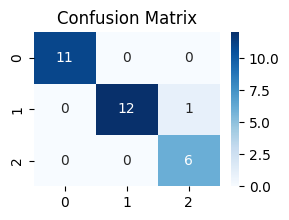

In [ ]:
y_pred = model2.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1:.2f}")
print(f"Recall Score: {recall:.2f}")

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

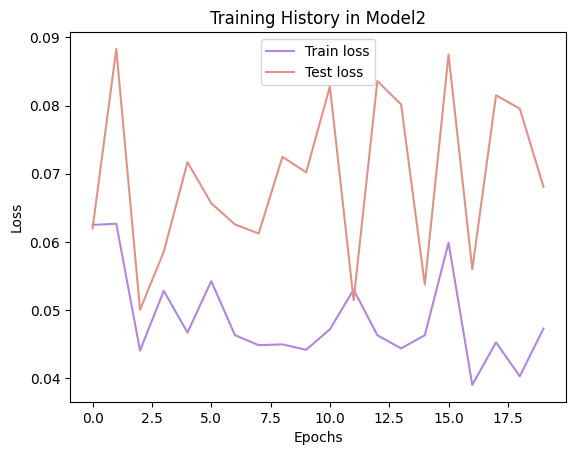

In [ ]:
plt.plot(history.history['loss'], color='#b186e1', label='Train loss')
plt.plot(history.history['val_loss'], color='#e19186', label='Test loss')
plt.title('Training History in Model2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()